#  OBJECT DETECTION DATASET

In [8]:
import d2l 
import os
from mxnet import * 
from mxnet.gluon import nn
npx.set_np()

In [9]:
d2l.DATA_HUB['pikachu'] = (d2l.DATA_URL + 'pikachu.zip', 
                          '68ab1bd42143c5966785eb0d7b2839df8d570190')

In [10]:
def load_data_pikachu(batch_size, edge_size= 256):
    data_dir = d2l.download_extract('pikachu')
    train_iter = image.ImageDetIter(
    path_imgrec= os.path.join(data_dir, 'train.rec'),
    path_imgidx = os.path.join(data_dir, 'train.idx'),
    batch_size=batch_size,
    data_shape= (3, edge_size, edge_size),
    shuffle= True,
    rand_crop= 1, 
    min_object_covered  = 0.95, max_attempts= 200)
    
    val_iter= image.ImageDetIter( path_imgrec = os.path.join(data_dir, 'val.rec'),
    batch_size=batch_size,
    data_shape= (3, edge_size, edge_size), shuffle=False)
    
    return train_iter, val_iter

In [11]:
batch_size, edge_size = 32, 256
train_iter, _ = load_data_pikachu(batch_size, edge_size)
batch = train_iter.next()
batch.data[0].shape, batch.label[0].shape

((32, 3, 256, 256), (32, 1, 5))

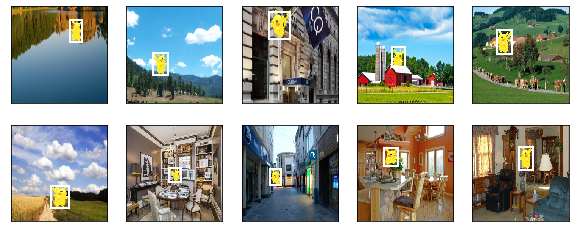

In [13]:
imgs= (batch.data[0][0:10].transpose(0, 2, 3, 1)) / 255
axes= d2l.show_images(imgs, 2, 5, scale= 2)
for ax, label in zip(axes, batch.label[0][0:10]):
    d2l.show_bboxes(ax, [label[0][1:5] * edge_size], colors= ['w'])